## Implémentation de la partie 4 du projet

Résolution du problème de recherche du plus court chemin pour les deux scénarios 1 et 2. L'utilisateur doit entrer la valeur 1 pour résoudre le problème avec le premier scénario et 2 pour résoudre le problème avec le second scénario

In [1]:
import gurobipy as gp
from gurobi import *
import numpy as np
#Dans cette partie, nous allons considérer chaque arcs comme étant une variable de décision
#Ainsi pour 12 arcs nous aurons 10 variables de décision 
n = 12

#Nous allons déclarer la matrice des contraintes du PL sans la dernière car redondante
mat_contraintes = np.array([
    [1,1,1,0,0,0,0,0,0,0,0,0], 
    [-1,0,0,1,1,1,0,0,0,0,0,0],
    [0,-1,0,0,-1,0,1,1,-1,0,0,0],
    [0, 0, -1, 0, 0, -1, 0, 0, 1, 1, 0, 0],
    [0, 0, 0, -1, 0, 0, -1, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 1],
])

#Vecteur des temps pour chaque arc pour chaque scénario
cas = int(input("Choisir 1 pour le premier scénario et 2 pour l'autre "))
if (cas == 1):
    t = np.array([5, 10, 2, 4, 4, 1, 3, 1, 1, 3, 1, 1])
else :
    t = np.array([3, 4, 6, 6, 2, 3, 1, 2, 4, 5, 1, 1])

model = gp.Model("Partie 4 -  MOGPL")

#Ajout des variables (qui représentent nos arcs)
x = np.array([model.addVar(vtype = GRB.BINARY, name ="x_%d" %(i+1))for i in range(n)])
#En d'autres termes, nous créeons notre liste d'arcs en fonction de la matrice d'adjacence

#MAJ pour intégrer les nouvelles variables de notre pl
model.update()
#Déclaration des contraintes de conservation du flôt
b = [1,0,0,0,0,0]
for i in range(len(mat_contraintes)):
    model.addConstr(quicksum(mat_contraintes[i][j]*x[j] for j in range(n)) == b[i])

#Déclaration de la fonction objectif 
f_objectif = LinExpr();
f_objectif = 0

for i in range(n):
    f_objectif += x[i]*t[i]
    
model.setObjective(f_objectif,GRB.MINIMIZE)

#Résolution du problème 
model.optimize()

xfinal = np.array([x[i].x for i in range(n)])

print("Le scénario pris est ",cas)
print("Le chemin optimal est :",xfinal)
print("Le chemin le plus rapide a pour temps t = :",model.ObjVal)

Choisir 1 pour le premier scénario et 2 pour l'autre 1
Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-17
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[rosetta2])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 6 rows, 12 columns and 22 nonzeros
Model fingerprint: 0x8d3de9c5
Variable types: 0 continuous, 12 integer (12 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 10.0000000
Presolve removed 6 rows and 12 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 2: 5 10 

Optimal solution found (tolerance 1.00e-04)
Best objective 5.000000000000e+00, best bound 5.000

### Question 2 - Application du programme linéaire pour trouver un chemin robuste sur le graphe de l'énoncé du projet 

In [2]:
import gurobipy as gp
from gurobi import *
import numpy as np
#Dans cette partie, nous allons considérer chaque arcs comme étant une variable de décision
#Ainsi pour 12 arcs nous aurons 10 variables de décision 
n = 12
s = 2 #Nous avons 2 scénarios 
#Nous allons déclarer la matrice des contraintes du PL sans la dernière contrainte car redondante
mat_contraintes = np.array([
    [1,1,1,0,0,0,0,0,0,0,0,0], 
    [-1,0,0,1,1,1,0,0,0,0,0,0],
    [0,-1,0,0,-1,0,1,1,-1,0,0,0],
    [0, 0, -1, 0, 0, -1, 0, 0, 1, 1, 0, 0],
    [0, 0, 0, -1, 0, 0, -1, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 1],
    
])

#Vecteur des temps pour chaque arc pour chaque scénario
t1 = np.array([5, 10, 2, 4, 4, 1, 3, 1, 1, 3, 1, 1])
t2 = np.array([3, 4, 6, 6, 2, 3, 1, 2, 4, 5, 1, 1])
#Ahout du vecteur poids 
w = [1,1]


#Modèle 
model = gp.Model("Partie 4 -  MOGPL")

#Ajout des variables (qui représentent nos arcs)
x = np.array([model.addVar(vtype = GRB.BINARY, name ="x_%d" %(i+1))for i in range(n)])
#En d'autres termes, nous créeons notre liste d'arcs en fonction de la matrice d'adjacence
#Ajout des variables associées à la linéarisation de notre problème
z =np.array([ model.addVar(vtype=GRB.CONTINUOUS,lb=0, name="z%d" % (i+1)) for i in range(s)])

rk =np.array([ model.addVar(vtype=GRB.CONTINUOUS,lb= - GRB.INFINITY,name="r%d" % (k+1)) for k in range(s) ])

bik = np.array([[model.addVar(vtype = GRB.CONTINUOUS, lb = 0, name ="b%d_%d" %(i+1,k+1)) for k in range(s)]for i in range(s)])


#MAJ pour intégrer les nouvelles variables de notre pl
model.update()
#Déclaration des contraintes de conservation du flôt

b = [1,0,0,0,0,0]

for i in range(len(mat_contraintes)):
    model.addConstr(quicksum(mat_contraintes[i][j]*x[j] for j in range(n)) == b[i])

#Déclaration des contraintes liées à la linéarisation du problème 
for k in range(s):
    for i in range(s):
        model.addConstr(rk[k] - bik[i,k] <= - z[i])
        
model.addConstr(z[0] == quicksum(t1[j]*x[j] for j in range(n)))
model.addConstr(z[1] == quicksum(t2[j]*x[j] for j in range(n)))

#Déclaration de la fonction objectif 
f_objectif = LinExpr();

for k in range(s):
    f_objectif += w[k]*((k+1)*rk[k] - quicksum(bik[i][k] for i in range(s)) )
    
model.setObjective(f_objectif,GRB.MAXIMIZE)

#Résolution du problème 
model.optimize()

xfinal = np.array([x[i].x for i in range(n)])
zfinal = np.array([z[i].x for i in range(s)])

print("Le chemin optimal est :",xfinal)
print("Le chemin le plus rapide a pour temps = :",zfinal)

Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[rosetta2])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 12 rows, 20 columns and 60 nonzeros
Model fingerprint: 0x8386f67f
Variable types: 8 continuous, 12 integer (12 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [1e+00, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 4 rows and 6 columns
Presolve time: 0.00s
Presolved: 8 rows, 14 columns, 39 nonzeros
Variable types: 0 continuous, 14 integer (10 binary)
Found heuristic solution: objective -31.0000000
Found heuristic solution: objective -30.0000000

Root relaxation: objective -2.781818e+01, 10 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 infeasible    0       -30.000

### Génération aléatoire des instances et représentation des nuages de points 

Nous allons dans un premier temps définir la fonction résolution afin d'éviter la redondance du code et de faciliter la lisibilité de ce dernier.

In [3]:
import gurobipy as gp
from gurobi import *
import numpy as np
import matplotlib.pyplot as plt 

def resolution(t1,t2,w):
    n = 12
    s = 2 #Nous avons 2 scénarios 
#Nous allons déclarer la matrice des contraintes du PL sans la dernière contrainte car redondante
    mat_contraintes = np.array([
    [1,1,1,0,0,0,0,0,0,0,0,0], 
    [-1,0,0,1,1,1,0,0,0,0,0,0],
    [0,-1,0,0,-1,0,1,1,-1,0,0,0],
    [0, 0, -1, 0, 0, -1, 0, 0, 1, 1, 0, 0],
    [0, 0, 0, -1, 0, 0, -1, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, -1, 0, -1, 0, 1]])

#Modèle 
    model = gp.Model("Partie 4 -  MOGPL")

#Ajout des variables (qui représentent nos arcs)
    x = np.array([model.addVar(vtype = GRB.BINARY, name ="x_%d" %(i+1))for i in range(n)])
#En d'autres termes, nous créeons notre liste d'arcs en fonction de la matrice d'adjacence
#Ajout des variables associées à la linéarisation de notre problème
    z =np.array([ model.addVar(vtype=GRB.CONTINUOUS,lb=0, name="z%d" % (i+1)) for i in range(s)])

    rk =np.array([ model.addVar(vtype=GRB.CONTINUOUS,lb=-GRB.INFINITY,name="r%d" % (k+1)) for k in range(s) ])

    bik = np.array([[model.addVar(vtype = GRB.CONTINUOUS, lb = 0, name ="b%d_%d" %(i+1,k+1)) for k in range(s)]for i in range(s)])


#MAJ pour intégrer les nouvelles variables de notre pl
    model.update()
#Déclaration des contraintes de conservation du flôt

    b = [1,0,0,0,0,0]

    for i in range(len(mat_contraintes)):
        model.addConstr(quicksum(mat_contraintes[i][j]*x[j] for j in range(n)) == b[i])

#Déclaration des contraintes liées à la linéarisation du problème 
    for k in range(s):
        for i in range(s):
            model.addConstr(rk[k] - bik[i,k] <= - z[i])
        
    model.addConstr(z[0] == quicksum(t1[j]*x[j] for j in range(n)))
    model.addConstr(z[1] == quicksum(t2[j]*x[j] for j in range(n)))

#Déclaration de la fonction objectif 
    f_objectif = LinExpr();

    for k in range(s):
        f_objectif += w[k]*((k+1)*rk[k] - quicksum(bik[i][k] for i in range(s)) )
    
    model.setObjective(f_objectif,GRB.MAXIMIZE)

#Résolution du problème 
    model.optimize()

    xfinal = np.array([x[i].x for i in range(n)])
    zfinal = np.array([z[i].x for i in range(s)])

    print("Le chemin optimal est :",xfinal)
    print("Le chemin le plus rapide a pour temps = :",zfinal)
    return zfinal


Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[rosetta2])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 12 rows, 20 columns and 60 nonzeros
Model fingerprint: 0x48252c2d
Variable types: 8 continuous, 12 integer (12 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [3e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 4 rows and 5 columns
Presolve time: 0.00s
Presolved: 8 rows, 15 columns, 40 nonzeros
Variable types: 2 continuous, 13 integer (11 binary)
Found heuristic solution: objective -30.4375000
Found heuristic solution: objective -28.0000000

Root relaxation: objective -2.168966e+01, 9 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  -21.68966    0    5  -28.0000

Presolve time: 0.00s
Presolved: 7 rows, 13 columns, 37 nonzeros
Variable types: 2 continuous, 11 integer (9 binary)
Found heuristic solution: objective -21.9062500
Found heuristic solution: objective -19.9062500

Root relaxation: objective -1.921429e+01, 6 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  -19.21429    0    6  -19.90625  -19.21429  3.48%     -    0s
*    0     0               0     -19.6562500  -19.65625  0.00%     -    0s

Explored 1 nodes (7 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 8 (of 8 available processors)

Solution count 3: -19.6562 -19.9062 -21.9062 
No other solutions better than -19.6562

Optimal solution found (tolerance 1.00e-04)
Best objective -1.965625000000e+01, best bound -1.965625000000e+01, gap 0.0000%
Le chemin optimal est : [ 0.  0.  1. -0. -0. -0. -0. -0. -0.  1.


Optimal solution found (tolerance 1.00e-04)
Best objective -2.300000000000e+01, best bound -2.300000000000e+01, gap 0.0000%
Le chemin optimal est : [ 0.  1.  0. -0. -0. -0.  1. -0. -0.  0.  1.  0.]
Le chemin le plus rapide a pour temps = : [23. 23.]
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[rosetta2])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 12 rows, 20 columns and 60 nonzeros
Model fingerprint: 0xd95a642d
Variable types: 8 continuous, 12 integer (12 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [3e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 6 rows and 8 columns
Presolve time: 0.00s
Presolved: 6 rows, 12 columns, 35 nonzeros
Variable types: 2 continuous, 10 integer (9 binary)
Found heuristic solution: objective -30.7187500
Found heuristic solution: objective -26.8125000

Root relaxation: objective -2.30

  Objective range  [3e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 5 rows and 7 columns
Presolve time: 0.00s
Presolved: 7 rows, 13 columns, 36 nonzeros
Variable types: 2 continuous, 11 integer (9 binary)
Found heuristic solution: objective -19.7500000
Found heuristic solution: objective -18.8125000

Root relaxation: cutoff, 0 iterations, 0.00 seconds (0.00 work units)

Explored 1 nodes (0 simplex iterations) in 0.03 seconds (0.00 work units)
Thread count was 8 (of 8 available processors)

Solution count 2: -18.8125 -19.75 
No other solutions better than -18.8125

Optimal solution found (tolerance 1.00e-04)
Best objective -1.881250000000e+01, best bound -1.881250000000e+01, gap 0.0000%
Le chemin optimal est : [ 0. -0.  1. -0. -0. -0. -0. -0. -0.  1.  0.  1.]
Le chemin le plus rapide a pour temps = : [19. 13.]
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[rosetta2])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logica

Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [3e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 5 rows and 7 columns
Presolve time: 0.00s
Presolved: 7 rows, 13 columns, 36 nonzeros
Variable types: 2 continuous, 11 integer (9 binary)
Found heuristic solution: objective -22.7187500
Found heuristic solution: objective -17.7812500

Root relaxation: cutoff, 2 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0     cutoff    0       -17.78125  -17.78125  0.00%     -    0s

Explored 1 nodes (2 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 8 (of 8 available processors)

Solution count 2: -17.7812 -22.7188 
No other solutions better than -17.7812

Optimal solution found (tolerance 1.00e-04)
Best objective -1.778125000000e+01, best bound 

Thread count was 8 (of 8 available processors)

Solution count 3: -23.8438 -25 -25.875 
No other solutions better than -23.8438

Optimal solution found (tolerance 1.00e-04)
Best objective -2.384375000000e+01, best bound -2.384375000000e+01, gap 0.0000%
Le chemin optimal est : [ 0.  1. -0. -0. -0.  0.  1. -0. -0.  0.  1. -0.]
Le chemin le plus rapide a pour temps = : [24. 19.]
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[rosetta2])

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 12 rows, 20 columns and 60 nonzeros
Model fingerprint: 0x2485c337
Variable types: 8 continuous, 12 integer (12 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [3e-02, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 5 rows and 7 columns
Presolve time: 0.00s
Presolved: 7 rows, 13 columns, 35 nonzeros
Variable types: 2 continuous, 11 integer (9 binary)
F

Presolve time: 0.00s
Presolved: 8 rows, 15 columns, 42 nonzeros
Variable types: 2 continuous, 13 integer (11 binary)
Found heuristic solution: objective -35.7812500
Found heuristic solution: objective -22.9062500

Root relaxation: objective -2.257143e+01, 9 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  -22.57143    0    6  -22.90625  -22.57143  1.46%     -    0s

Explored 1 nodes (9 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 8 (of 8 available processors)

Solution count 2: -22.9062 -35.7812 
No other solutions better than -22.9062

Optimal solution found (tolerance 1.00e-04)
Best objective -2.290625000000e+01, best bound -2.290625000000e+01, gap 0.0000%
Le chemin optimal est : [ 0.  1. -0. -0. -0. -0. -0.  1. -0. -0. -0.  1.]
Le chemin le plus rapide a pour temps = : [23. 20.]
Gurobi Optimizer vers

H    0     0                     -23.8125000  -23.53846  1.15%     -    0s
     0     0  -23.53846    0    6  -23.81250  -23.53846  1.15%     -    0s

Explored 1 nodes (11 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 8 (of 8 available processors)

Solution count 2: -23.8125 -29.7812 
No other solutions better than -23.8125

Optimal solution found (tolerance 1.00e-04)
Best objective -2.381250000000e+01, best bound -2.381250000000e+01, gap 0.0000%
Le chemin optimal est : [0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
Le chemin le plus rapide a pour temps = : [18. 24.]


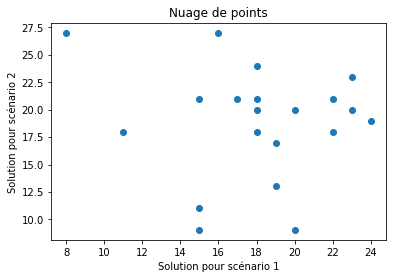

In [23]:
#w = [0,1/2] #Vecteur pour alpha = 1
#w = [1/2 , 1/4] #Vecteur pour alpha = 2
#w = [3/4 , 1/8] #Vecteur pour alpha = 3
#w = [7/8 , 1/16] #Vecteur pour alpha = 4
w = [15/16,1/32] #Vecteur pour alpha = 5
def tirage():
    t=np.random.randint(1,15, size=(1, 12))
    return(t[0])

t1= []
t2= []
z1=[]
z2=[]
for i in range(20):
    t1.append(tirage())
    t2.append(tirage())
    z1.append(resolution(t1[i],t2[i],w)[0])
    z2.append(resolution(t1[i],t2[i],w)[1])
    

plt.scatter(z1,z2)
plt.title('Nuage de points')
plt.xlabel('Solution pour scénario 1')
plt.ylabel('Solution pour scénario 2')
plt.savefig('ScatterPlot.png')
plt.show()